# DBSCAN 알고리즘 (밀도기반 군집) 

기하학적으로 복잡한 데이터 새트에도 효과적인 군집화가 가능하다.

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [3]:
X,_ = make_moons(n_samples= 300, noise= 0.05, random_state= 42)
X[:3]

array([[ 0.62251913, -0.37210134],
       [ 1.90426932, -0.13630295],
       [-0.06943128,  0.45611698]])

In [ ]:
dbscan = DBSCAN(eps= 0.2, min_samples=5) # 반경: 원을 그렸을 경우 그 안에 점들의 갯수, 최소 5개
dbscan.fit(X)

DBSCAN(eps=0.2)

In [7]:
import numpy as np
np.unique(dbscan.labels_)

array([0, 1])

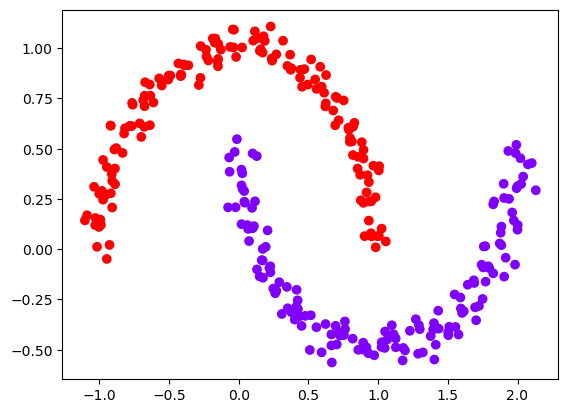

In [ ]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_, cmap= 'rainbow')
plt.show()

| 요소                 | 의미                           |
| ------------------ | ---------------------------- |
| `X[:,0]`           | X 데이터의 첫 번째 컬럼 (x축 값)        |
| `X[:,1]`           | X 데이터의 두 번째 컬럼 (y축 값)        |
| `c=dbscan.labels_` | 점의 색상을 DBSCAN이 할당한 군집 라벨로 설정 |
| `cmap='rainbow'`   | 군집 라벨에 따라 색상을 무지개 팔레트로 표시    |

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=['sepal_length'
                                                  ,'sepal_width'
                                                  ,'petal_width'
                                                  ,'petal_length'])

In [11]:
iris_dbscan = DBSCAN(eps=0.5, min_samples=8, metric='euclidean')
dbscan_lables = iris_dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster'] = dbscan_lables
iris_df[:3]

,sepal_length,sepal_width,petal_width,petal_length,dbscan_cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state= 0)
pca_transformed = pca.fit_transform(iris.data)
iris_df['ftr1'] = pca_transformed[:,0]
iris_df['ftr2'] = pca_transformed[:,1]

In [12]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*', 'P', 'D', 'v']
    isNoise = False

    # 클러스터 중심이 있는 경우만 처리
    if iscenter and hasattr(clusterobj, 'clustercenters'):
        centers = clusterobj.clustercenters
    else:
        iscenter = False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        # noise(-1) 여부 확인
        if label == -1:
            cluster_legend = 'Noise'
            isNoise = True
        else:
            cluster_legend = f'Cluster {label}'

        marker_style = markers[label % len(markers)] if label != -1 else 'X'

        # 클러스터 점 찍기
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
                    s=70, edgecolor='k', marker=marker_style, label=cluster_legend)

        # 중심 표시
        if iscenter and label != -1:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        edgecolor='k', alpha=0.9, marker=marker_style)
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker=f'${label}$')

    plt.legend(loc='upper center' if isNoise else 'upper right')
    plt.title(f"Clustering result: {label_name}")
    plt.xlabel("ftr1 (PCA 1)")
    plt.ylabel("ftr2 (PCA 2)")
    plt.grid(True)
    plt.show()

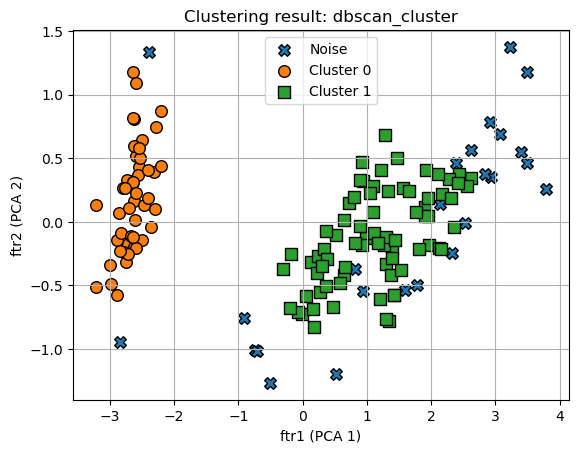

In [16]:
visualize_cluster_plot(dbscan , iris_df, 'dbscan_cluster',iscenter=False)

하이퍼파라미터 튜닝으로 노이즈 줄이기

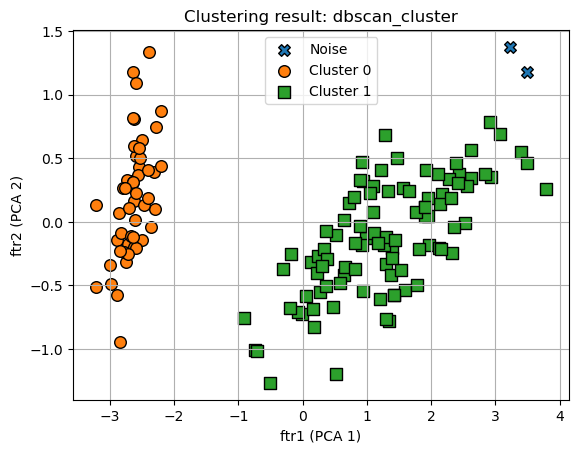

In [28]:
iris_dbscan = DBSCAN(eps=0.8, min_samples=3, metric='euclidean')
dbscan_lables = iris_dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster'] = dbscan_lables
visualize_cluster_plot(dbscan , iris_df, 'dbscan_cluster',iscenter=False)